# Candlestick Hammer

https://www.investopedia.com/terms/h/hammer.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2020-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


## Candlestick with Hammer

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,True
1,737427.0,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,True
2,737430.0,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,True
3,737431.0,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,False
4,737432.0,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,False


Text(0, 0.5, 'Price')

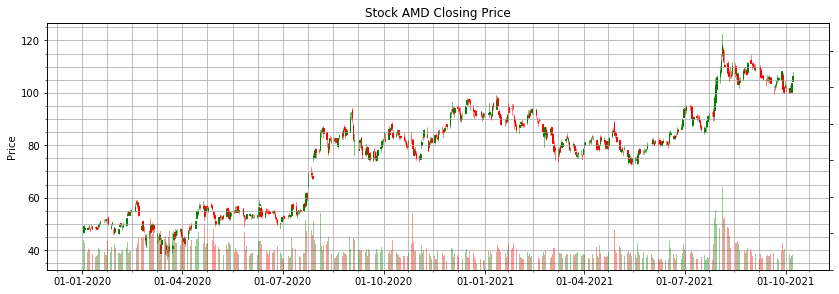

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
hammer = talib.CDLHAMMER(df['Open'], df['High'], df['Low'], df['Close'])

hammer = hammer[hammer != 0]

In [6]:
df['hammer'] = talib.CDLHAMMER(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['hammer'] !=0]

,Open,High,Low,Close,Adj Close,Volume,hammer
Date,,,,,,,
2020-02-06,48.799999,49.389999,47.630001,49.320000,49.320000,48670600,100
2020-05-22,54.770000,55.369999,53.779999,55.169998,55.169998,43524100,100
2020-05-27,53.270000,53.279999,49.090000,52.740002,52.740002,102414500,100
2020-06-25,52.560001,52.700001,50.540001,51.930000,51.930000,51129600,100
2020-07-08,53.009998,53.470001,52.070000,53.430000,53.430000,35608300,100
2021-03-19,78.489998,79.339996,77.589996,79.059998,79.059998,42283400,100
2021-03-30,76.470001,76.559998,74.849998,76.000000,76.000000,39169300,100
2021-05-04,77.949997,78.669998,77.040001,78.610001,78.610001,59194300,100
2021-05-06,77.629997,78.059998,76.470001,77.889999,77.889999,38661300,100


In [8]:
df['Adj Close'].loc[df['hammer'] !=0]

Date
2020-02-06     49.320000
2020-05-22     55.169998
2020-05-27     52.740002
2020-06-25     51.930000
2020-07-08     53.430000
2021-03-19     79.059998
2021-03-30     76.000000
2021-05-04     78.610001
2021-05-06     77.889999
2021-08-31    110.720001
2021-09-13    104.800003
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['hammer'] !=0].index

DatetimeIndex(['2020-02-06', '2020-05-22', '2020-05-27', '2020-06-25',
               '2020-07-08', '2021-03-19', '2021-03-30', '2021-05-04',
               '2021-05-06', '2021-08-31', '2021-09-13'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
hammer

Date
2020-02-06    100
2020-05-22    100
2020-05-27    100
2020-06-25    100
2020-07-08    100
2021-03-19    100
2021-03-30    100
2021-05-04    100
2021-05-06    100
2021-08-31    100
2021-09-13    100
dtype: int32

In [11]:
hammer.index

DatetimeIndex(['2020-02-06', '2020-05-22', '2020-05-27', '2020-06-25',
               '2020-07-08', '2021-03-19', '2021-03-30', '2021-05-04',
               '2021-05-06', '2021-08-31', '2021-09-13'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,hammer
Date,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,0
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,0
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,0
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,0
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,0
...,...,...,...,...,...,...,...
2021-10-01,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,0
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0


Text(0, 0.5, 'Price')

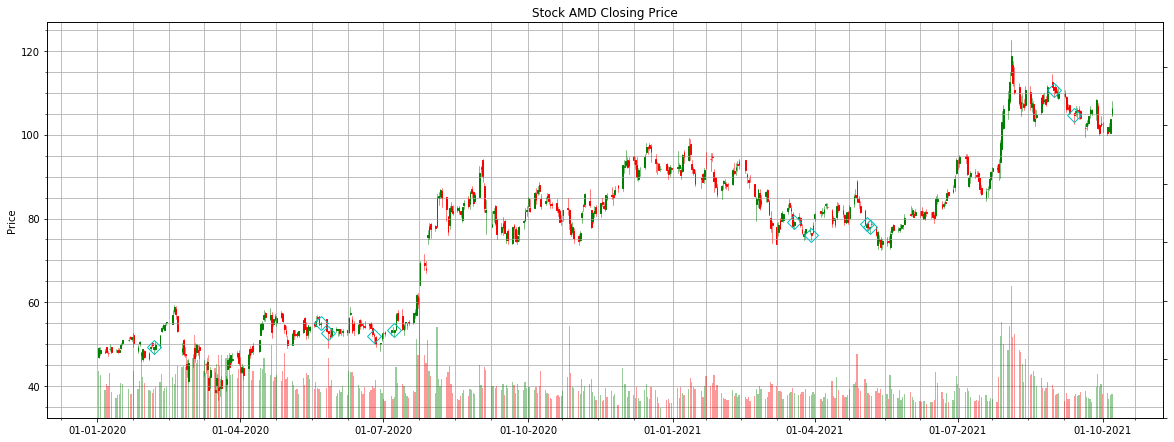

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['hammer'] !=0].index, df['Adj Close'].loc[df['hammer'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-08-01':'2021-10-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,hammer,VolumePositive
0,738004.0,105.930000,110.330002,103.830002,108.629997,108.629997,115581900,0,True
1,738005.0,108.150002,114.849998,107.660004,112.559998,112.559998,157723100,0,True
2,738006.0,114.360001,122.489998,114.160004,118.769997,118.769997,225368700,0,True
3,738007.0,116.629997,117.680000,111.589996,112.349998,112.349998,137860900,0,False
4,738008.0,110.550003,116.260002,109.699997,110.110001,110.110001,143792800,0,False


Text(0, 0.5, 'Price')

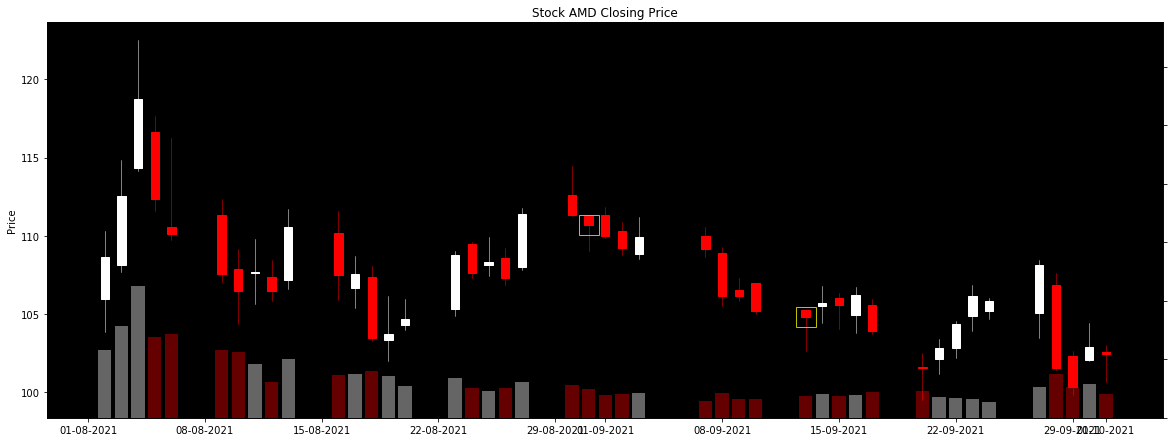

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='w', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['hammer'] !=0].index, df['Adj Close'].loc[df['hammer'] !=0],
                'sy', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=20.0) 
colors = dfc.VolumePositive.map({True: 'w', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

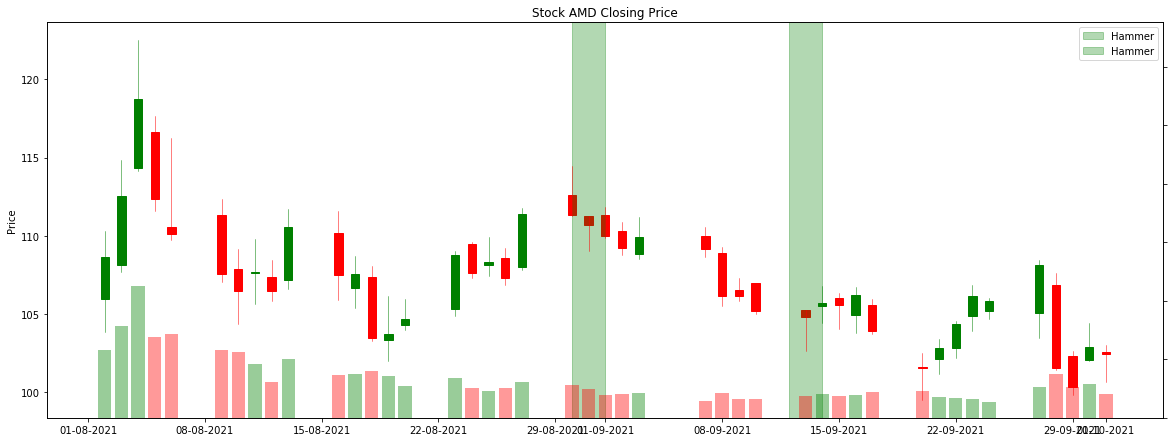

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,8,30)), date2num(datetime(2021,9,1)), 
           label="Hammer",color="green", alpha=0.3)
ax.axvspan(date2num(datetime(2021,9,12)), date2num(datetime(2021,9,14)), 
           label="Hammer",color="green", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')